In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import seaborn as sns

# データの読み込み
energy_data = pd.read_csv("/Users/narutakanomura/Desktop/local_compe/local_Getting Started/Energy_Data_20200920_20231027.csv")

# 'dtm' を日付型に変換し、2021年のデータのみをフィルタリング
energy_data["dtm"] = pd.to_datetime(energy_data["dtm"])
energy_data_2021 = energy_data[energy_data["dtm"].dt.year == 2021]

# グラフの計算
energy_data_2021["Wind_MWh_credit"] = 0.5*energy_data_2021["Wind_MW"] - energy_data_2021["boa_MWh"]
energy_data_2021["Solar_MWh_credit"] = 0.5*energy_data_2021["Solar_MW"]
energy_data_2021["total_generation_MWh"] = energy_data_2021["Wind_MWh_credit"] + energy_data_2021["Solar_MWh_credit"]

/var/folders/39/jc66nmzj1ds6kh72kmdgnzn40000gn/T/ipykernel_2333/3136083850.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_data_2021["Wind_MWh_credit"] = 0.5*energy_data_2021["Wind_MW"] - energy_data_2021["boa_MWh"]
/var/folders/39/jc66nmzj1ds6kh72kmdgnzn40000gn/T/ipykernel_2333/3136083850.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_data_2021["Solar_MWh_credit"] = 0.5*energy_data_2021["Solar_MW"]
/var/folders/39/jc66nmzj1ds6kh72kmdgnzn40000gn/T/ipykernel_2333/3136083850.py:17: Se

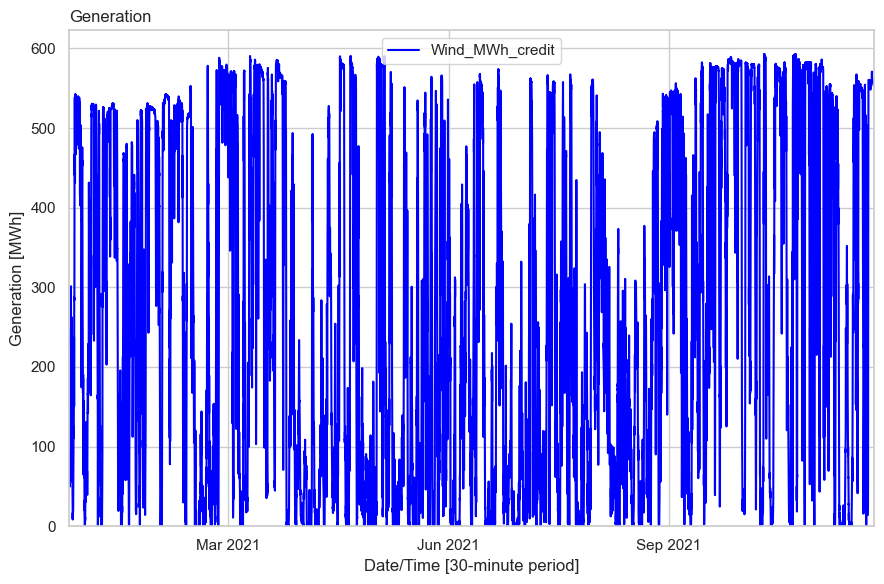

In [9]:
# グラフの描画（風力発電のみ）
plt.figure(figsize=(9,6))
sns.set(style='whitegrid')
sns.color_palette("pastel", as_cmap=True)
ax = sns.lineplot(data=energy_data_2021, x="dtm", y="Wind_MWh_credit",
                   label='Wind_MWh_credit', color='blue')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))
ax.set_xlim(left=energy_data_2021['dtm'].min(), right=energy_data_2021['dtm'].max())
ax.set_ylim(0)
plt.title("Generation", loc='left')
plt.xlabel("Date/Time [30-minute period]")
plt.ylabel("Generation [MWh]")
ax.legend(loc='best')
plt.tight_layout()

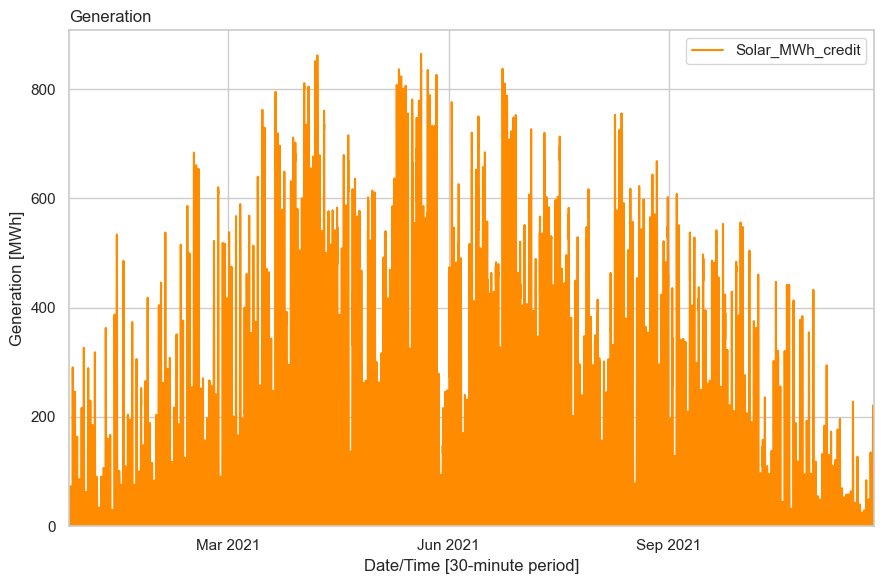

In [11]:
# グラフの描画（太陽光発電のみ）
plt.figure(figsize=(9,6))
sns.set(style='whitegrid')
sns.color_palette("pastel", as_cmap=True)
ax = sns.lineplot(data=energy_data_2021, x="dtm", y="Solar_MWh_credit",
                   label='Solar_MWh_credit', color="darkorange")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))
ax.set_xlim(left=energy_data_2021['dtm'].min(), right=energy_data_2021['dtm'].max())
ax.set_ylim(0)
plt.title("Generation", loc='left')
plt.xlabel("Date/Time [30-minute period]")
plt.ylabel("Generation [MWh]")
ax.legend(loc='best')
plt.tight_layout()

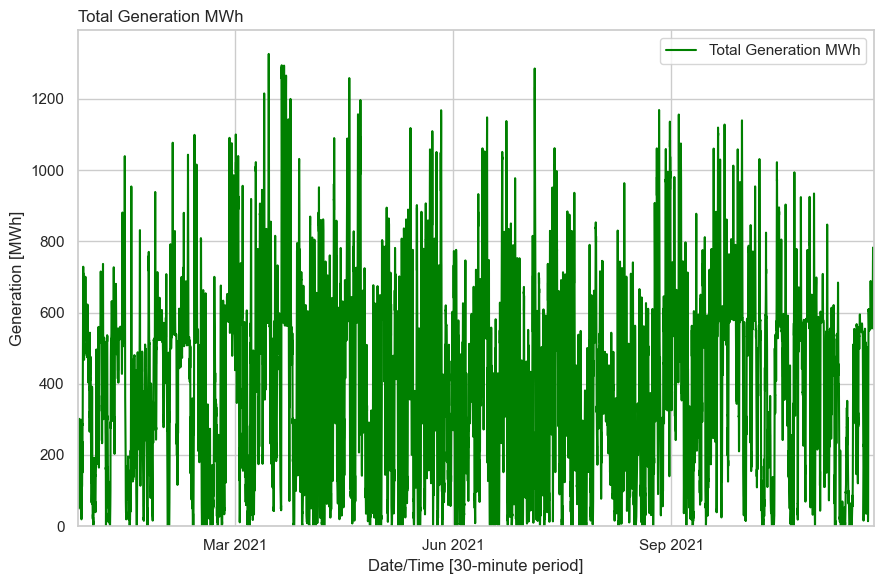

In [12]:
# グラフの描画（合計発電量）
plt.figure(figsize=(9,6))
sns.set(style='whitegrid')
sns.color_palette("pastel", as_cmap=True)
ax = sns.lineplot(data=energy_data_2021, x="dtm", y="total_generation_MWh",
                   label='Total Generation MWh', color="green")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))
ax.set_xlim(left=energy_data_2021['dtm'].min(), right=energy_data_2021['dtm'].max())
ax.set_ylim(0)
plt.title("Total Generation MWh", loc='left')
plt.xlabel("Date/Time [30-minute period]")
plt.ylabel("Generation [MWh]")
ax.legend(loc='best')
plt.tight_layout()